In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('./weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# 最低溫度

In [3]:
print("Minimum Temperature   "+str(df['MinTemp'].min()))
df.groupby('Location')['MinTemp'].min().nsmallest()

Minimum Temperature   -8.5


Location
MountGinini    -8.5
Tuggeranong    -8.2
Canberra       -8.0
Ballarat       -5.6
AliceSprings   -5.2
Name: MinTemp, dtype: float64

# 最高溫度

In [4]:
print("Maximum Temperature   "+str(df['MaxTemp'].max()))
df.groupby('Location')['MaxTemp'].max().nlargest()

Maximum Temperature   48.1


Location
Woomera             48.1
Moree               47.3
Richmond            47.0
Penrith             46.9
MelbourneAirport    46.8
Name: MaxTemp, dtype: float64

In [5]:
print("Highest Rainfall      "+str(df['Rainfall'].max()))
df.groupby('Location')['Rainfall'].max().nlargest()

Highest Rainfall      371.0


Location
CoffsHarbour    371.0
Darwin          367.6
Cairns          278.4
Newcastle       240.0
Townsville      236.8
Name: Rainfall, dtype: float64

# 缺失值的比例

In [6]:
df.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

# 資料清洗

In [7]:
df=df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis = 1) #此幾個欄位有近50%的缺失值，故不採納

In [8]:
df_cat=df[['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Date','Location']] #把非數值型的欄位取出數值

df_num=df.drop(['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Date','Location'], axis = 1)#刪除非數值型的欄位

In [9]:
for col in df_cat.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    df_cat[col] = df.groupby(['Location'])[col].apply(lambda x: x.fillna(x.mode().max()))


In [10]:
df_cat.isnull().mean()  #觀察是缺失值的比例

WindGustDir     0.041792
WindDir9am      0.000000
WindDir3pm      0.000000
RainToday       0.000000
RainTomorrow    0.000000
Date            0.000000
Location        0.000000
dtype: float64

In [11]:
df_cat['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode().max())

In [12]:
df_num.columns.values

array(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'], dtype=object)

In [13]:
for col in df_num.columns.values:
    print(df[col])

0         13.4
1          7.4
2         12.9
3          9.2
4         17.5
          ... 
145455     2.8
145456     3.6
145457     5.4
145458     7.8
145459    14.9
Name: MinTemp, Length: 145460, dtype: float64
0         22.9
1         25.1
2         25.7
3         28.0
4         32.3
          ... 
145455    23.4
145456    25.3
145457    26.9
145458    27.0
145459     NaN
Name: MaxTemp, Length: 145460, dtype: float64
0         0.6
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: Rainfall, Length: 145460, dtype: float64
0         44.0
1         44.0
2         46.0
3         24.0
4         41.0
          ... 
145455    31.0
145456    22.0
145457    37.0
145458    28.0
145459     NaN
Name: WindGustSpeed, Length: 145460, dtype: float64
0         20.0
1          4.0
2         19.0
3         11.0
4          7.0
          ... 
145455    13.0
145456    13.0
145457     9.0
145458    13.0
145459    

In [14]:
for col in df_num.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    df_num[col] = df.groupby(['Location'])[col].apply(lambda x: x.fillna(x.mean()))

In [15]:
df_num['WindGustSpeed']=df_num['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df_num['Pressure9am']=df_num['Pressure9am'].fillna(df['Pressure9am'].mean())
df_num['Pressure3pm']=df_num['Pressure3pm'].fillna(df['Pressure3pm'].mean())

In [16]:
d={'Yes':1,'No':0}
df_cat['RainTomorrow']=df_cat['RainTomorrow'].map(d)
df_cat['RainToday']=df_cat['RainToday'].map(d)

In [17]:
df_cat2=df_cat[['WindGustDir','WindDir9am','WindDir3pm','Location']]

#Replacing Categories value with value counts

df_cat2['Location']=df_cat2['Location'].map(df_cat2['Location'].value_counts())
df_cat2['WindGustDir']=df_cat2['WindGustDir'].map(df_cat2['WindGustDir'].value_counts())
df_cat2['WindDir9am']=df_cat2['WindDir9am'].map(df_cat2['WindDir9am'].value_counts())
df_cat2['WindDir3pm']=df_cat2['WindDir3pm'].map(df_cat2['WindDir3pm'].value_counts())

In [18]:
df_n=pd.merge(df_num, df_cat2, left_index=True, right_index=True)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_n)
df_scaled = pd.DataFrame(scaler.fit_transform(df_n),columns = df_n.columns)

In [20]:
df_x=pd.merge(df_scaled, df_cat['RainToday'],left_index=True, right_index=True)
df_x

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,WindGustDir,WindDir9am,WindDir3pm,Location,RainToday
0,0.189479,-0.043902,-0.210380,0.299901,0.673183,0.616456,0.108840,-1.442551,-1.476793,-1.222913,-0.008270,0.014770,2.434305,-0.308741,-0.301522,0.093743,0
1,-0.751913,0.266079,-0.281947,0.299901,-1.129806,0.387759,-1.320713,-1.296626,-1.045963,-1.117903,0.038038,0.375664,-0.443402,-0.192239,0.271735,0.093743,0
2,0.111029,0.350619,-0.281947,0.452211,0.560496,0.845154,-1.638391,-1.053417,-1.491649,-0.982890,0.624616,0.216870,-0.247298,-0.308741,0.271735,0.093743,0
3,-0.469496,0.674691,-0.281947,-1.223205,-0.340998,-1.098776,-1.267767,-1.734402,-0.006030,-0.367833,0.176965,0.693250,-0.711994,0.646571,-0.563421,0.093743,0
4,0.832763,1.280564,-0.162669,0.071435,-0.791746,0.159061,0.691250,-0.907491,-1.016251,-1.387928,0.130656,1.155195,2.434305,-0.828004,-0.295036,0.093743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.473647,0.026548,-0.281947,-0.690118,-0.115625,-0.870078,-0.950088,-1.345268,1.033904,0.757273,-1.057936,0.101384,-0.220415,0.646571,-1.100190,-5.132120,0
145456,-1.348128,0.294259,-0.281947,-1.375515,-0.115625,-1.098776,-0.685356,-1.491193,0.870485,0.577256,-0.934446,0.404535,-0.835129,0.646571,-0.241521,-5.132120,0
145457,-1.065711,0.519700,-0.281947,-0.233186,-0.566372,-1.098776,-0.844195,-1.345268,0.499081,0.232223,-0.687466,0.635507,-0.188731,0.646571,-0.301522,-5.132120,0
145458,-0.689154,0.533790,-0.281947,-0.918584,-0.115625,-1.327473,-0.950088,-1.345268,0.261382,0.187219,-0.286123,0.621072,-0.163528,0.102010,-0.241521,-5.132120,0


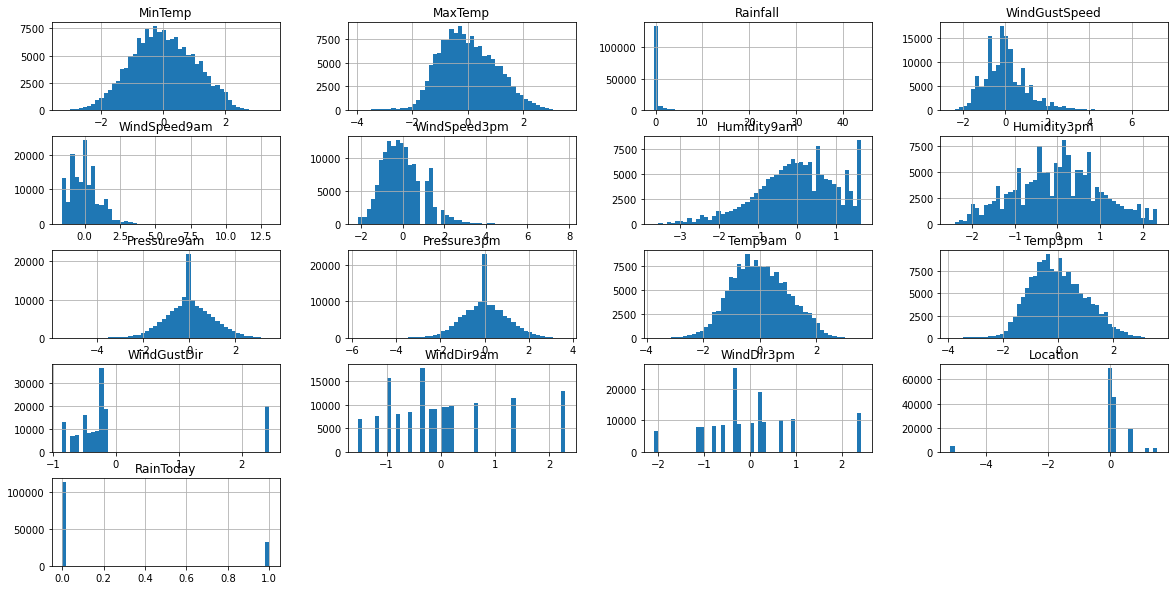

In [21]:
df_x.hist(bins=50, figsize=(20, 10))
plt.show()

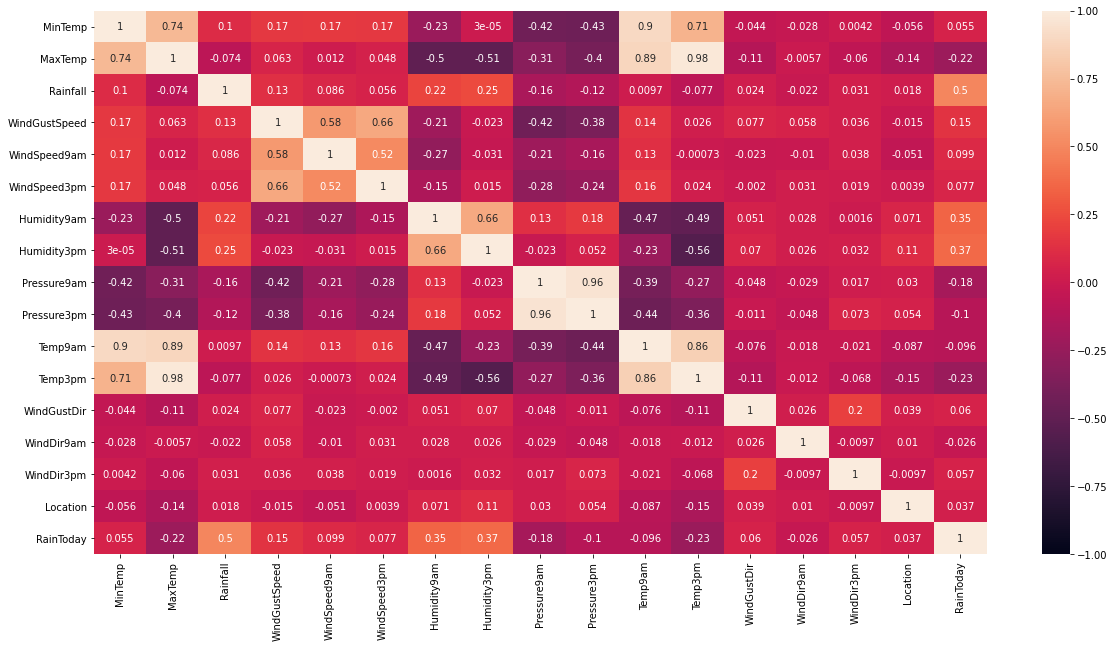

In [22]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df_x.corr(), vmin=-1, vmax=1, annot=True)

In [23]:
df_x.drop('Temp9am',axis=1,inplace=True)
df_x.drop('Temp3pm',axis=1,inplace=True)

In [24]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_x, df_cat['RainTomorrow'], test_size=0.2, random_state=50)

<AxesSubplot:>

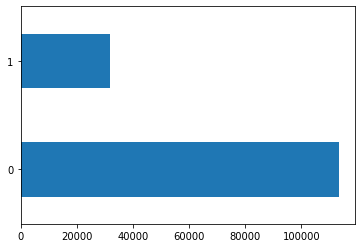

In [25]:
df_cat['RainTomorrow'].value_counts().plot(kind='barh')

# 資料切分

In [26]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 37) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
from collections import Counter

print("Before {}".format(Counter(y_train)))
print("After {}".format(Counter(y_train_res)))

Before Counter({0: 90784, 1: 25584})
After Counter({1: 90784, 0: 90784})


# 建立多個模型

In [27]:
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=10,random_state = 37)
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

y_pred = model.predict(X_test)

[14:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('Accuracy score {:.2f}'.format(accuracy_score(y_test,y_pred)*100))
print(classification_report(y_test,y_pred))

Confusion matrix 
 [[21360  1439]
 [ 2847  3446]]
Accuracy score 85.27
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22799
           1       0.71      0.55      0.62      6293

    accuracy                           0.85     29092
   macro avg       0.79      0.74      0.76     29092
weighted avg       0.84      0.85      0.85     29092



In [29]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC

model = RandomForestClassifier(max_depth=10, n_estimators=100,random_state = 37)
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('Accuracy score {:.2f}'.format(accuracy_score(y_test,y_pred)*100))
print(classification_report(y_test,y_pred))

Confusion matrix 
 [[19225  3574]
 [ 1844  4449]]
Accuracy score 81.38
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     22799
           1       0.55      0.71      0.62      6293

    accuracy                           0.81     29092
   macro avg       0.73      0.78      0.75     29092
weighted avg       0.84      0.81      0.82     29092



In [30]:
clf = AdaBoostClassifier(n_estimators=100, random_state = 37)
clf.fit(X_train_res, y_train_res)
clf.score(X_train_res, y_train_res)

y_pred = clf.predict(X_test)


print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('Accuracy score {:.2f}'.format(accuracy_score(y_test,y_pred)*100))
print(classification_report(y_test,y_pred))

Confusion matrix 
 [[19586  3213]
 [ 2136  4157]]
Accuracy score 81.61
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     22799
           1       0.56      0.66      0.61      6293

    accuracy                           0.82     29092
   macro avg       0.73      0.76      0.74     29092
weighted avg       0.83      0.82      0.82     29092



In [ ]:
svm = SVC(kernel='linear', probability=True, random_state = 37)
svm.fit(X_train_res,y_train_res)
svm.score(X_train_res, y_train_res)

y_pred = svm.predict(X_test)


print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('Accuracy score {:.2f}'.format(accuracy_score(y_test,y_pred)*100))
print(classification_report(y_test,y_pred))
